In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [4]:
df_car = pd.read_csv('Car_Price_Assignment/CarPrice_Assignment.csv')

In [5]:
df_car.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [6]:
#Importing all other required libraries
#  test train split
from sklearn.model_selection import train_test_split
#  feature scaling
from sklearn.preprocessing import MinMaxScaler
# statmodel linear regression
import statsmodels.api as sm
# RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
# Check for the VIF values  
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.metrics import mean_squared_error
from math import sqrt


In [7]:
df_car.shape

(205, 26)

In [8]:
df_car.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [9]:
df_car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [10]:
#Checking for Null vals
df_car.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [93]:
#Seperating numeric vars
df_car_num = list(df_car.columns[df_car.dtypes != 'object'])

In [94]:
df_car_num

['symboling',
 'wheelbase',
 'carlength',
 'carwidth',
 'carheight',
 'curbweight',
 'enginesize',
 'boreratio',
 'stroke',
 'compressionratio',
 'horsepower',
 'peakrpm',
 'citympg',
 'highwaympg',
 'price']

In [95]:
#Non-numeric vars
df_car_char = list(df_car.columns[df_car.dtypes == 'object'])

In [96]:
df_car_char

['CarName',
 'fueltype',
 'aspiration',
 'doornumber',
 'carbody',
 'drivewheel',
 'enginelocation',
 'enginetype',
 'cylindernumber',
 'fuelsystem',
 'company',
 'company_segment']

In [27]:
len(df_car_num) + len(df_car_char)

26

In [31]:
df_car.mean()

car_ID                103.000000
symboling               0.834146
wheelbase              98.756585
carlength             174.049268
carwidth               65.907805
carheight              53.724878
curbweight           2555.565854
enginesize            126.907317
boreratio               3.329756
stroke                  3.255415
compressionratio       10.142537
horsepower            104.117073
peakrpm              5125.121951
citympg                25.219512
highwaympg             30.751220
price               13276.710571
dtype: float64

In [32]:
#Dropping useless columns like car_ID
df_car.drop(columns='car_ID', inplace = True)

In [33]:
df_car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   symboling         205 non-null    int64  
 1   CarName           205 non-null    object 
 2   fueltype          205 non-null    object 
 3   aspiration        205 non-null    object 
 4   doornumber        205 non-null    object 
 5   carbody           205 non-null    object 
 6   drivewheel        205 non-null    object 
 7   enginelocation    205 non-null    object 
 8   wheelbase         205 non-null    float64
 9   carlength         205 non-null    float64
 10  carwidth          205 non-null    float64
 11  carheight         205 non-null    float64
 12  curbweight        205 non-null    int64  
 13  enginetype        205 non-null    object 
 14  cylindernumber    205 non-null    object 
 15  enginesize        205 non-null    int64  
 16  fuelsystem        205 non-null    object 
 1

# checking the relationship of all predictor vars with target var, price:

In [65]:
# Function for pair plots. Plot each numeric var with the target var price
def doPairPlots(df_car_numeric):

    #plt.figure(figsize=(22, 22))
    fig, axs = plt.subplots(1,len(df_car_numeric), figsize=(3*len(df_car_numeric),2.5), sharey=True)

    for i, col_name in enumerate(df_car_numeric):
        sns.scatterplot(data=df_car, x=col_name, y="price", ax=axs[i])
    fig.set_figheight(5)
    fig.set_figwidth(20)
    plt.tight_layout()
    plt.show()
df_car_num1= ['wheelbase','carlength','carwidth','carheight']
df_car_num2= ['enginesize','curbweight','boreratio','stroke'] 
df_car_num3= ['compressionratio','horsepower','peakrpm','citympg','highwaympg']

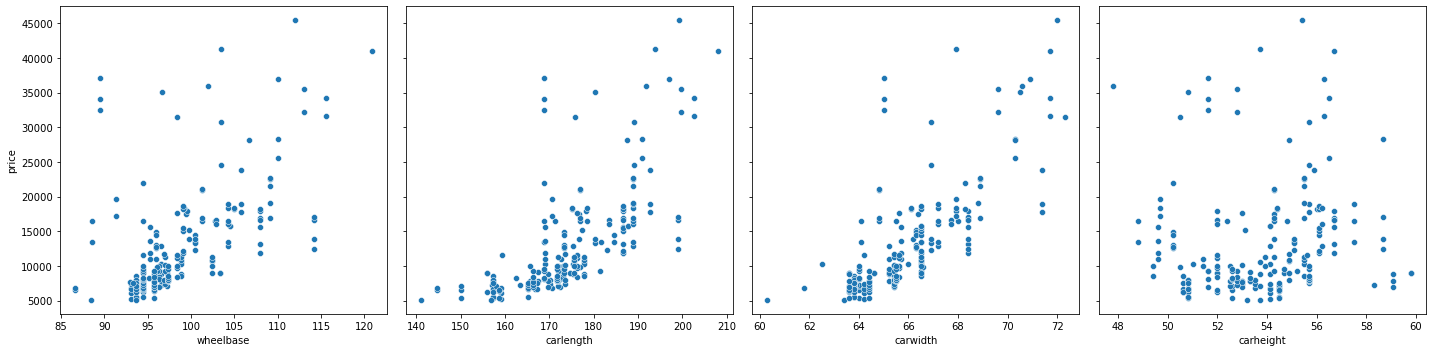

In [66]:
doPairPlots(df_car_num1)

carlen and carwid are nearly linear with price

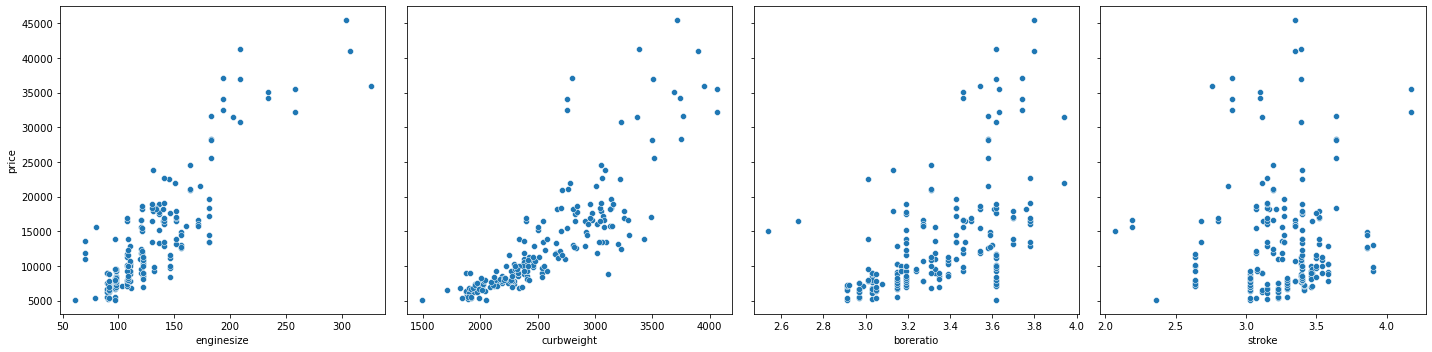

In [67]:
doPairPlots(df_car_num2)

enginesize, curbweight are almost linear with price

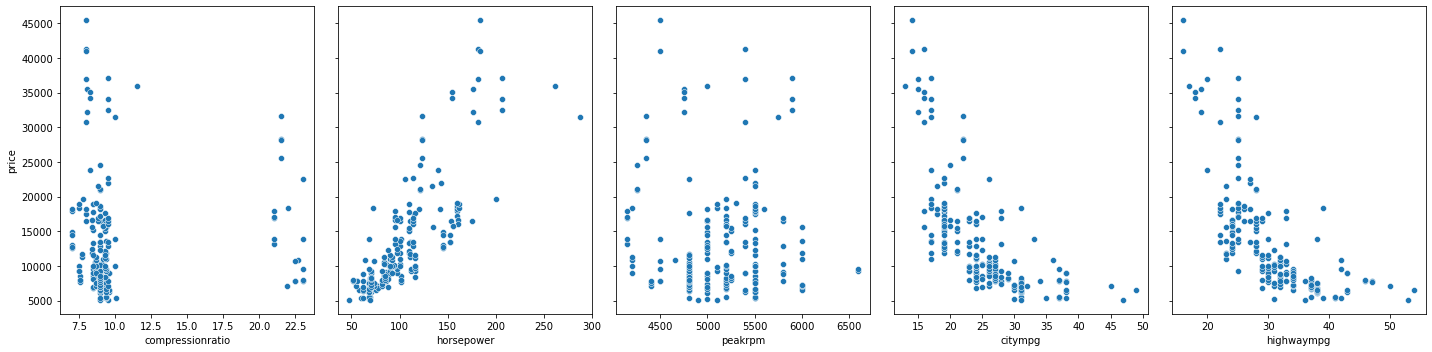

In [68]:
doPairPlots(df_car_num3)

horsepower is linear with price, and citympg/highwaympg are negatively linear with price

# Examining the heatmap

<AxesSubplot:>

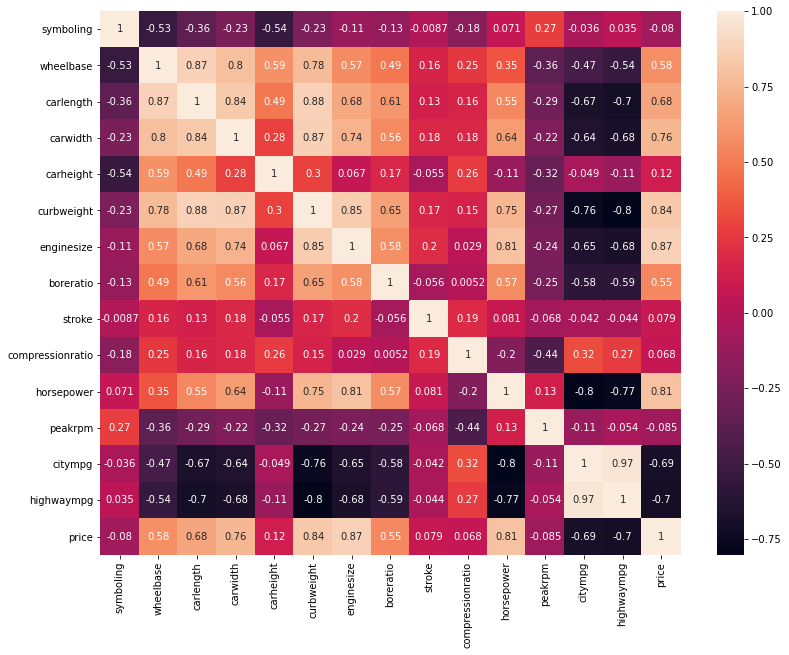

In [71]:
plt.figure(figsize = (13, 10))
sns.heatmap(df_car.corr(), annot = True)

We see that there are many pairs that have high correlation. Also, some variables like symboling and peakrpm show very little linear correlation with price.

In [113]:
#Extracting company name from CarName
df_car['company'] = df_car['CarName'].apply(lambda x: x.split( )[0].lower())
df_car['company'].replace('maxda','mazda',inplace=True)
df_car['company'].replace('porcshce','porsche',inplace=True)
df_car['company'].replace('toyouta','toyota',inplace=True)
df_car['company'].replace(['vokswagen','vw'],'volkswagen',inplace=True)
df_car['company'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

In [114]:
df_car['company'].nunique()

22

In [115]:
#Given so many unique values, we should cut this number down by bucketing company names wrt price ranges. Let us divide them into economy, mid, and luxury
df_car.groupby('company')['price'].mean().sort_values(ascending = False)

company
jaguar         34600.000000
buick          33647.000000
porsche        31400.500000
bmw            26118.750000
volvo          18063.181818
audi           17859.166714
mercury        16503.000000
alfa-romero    15498.333333
peugeot        15489.090909
saab           15223.333333
mazda          10652.882353
nissan         10415.666667
volkswagen     10077.500000
toyota          9885.812500
renault         9595.000000
mitsubishi      9239.769231
isuzu           8916.500000
subaru          8541.250000
honda           8184.692308
plymouth        7963.428571
dodge           7875.444444
chevrolet       6007.000000
Name: price, dtype: float64

In [116]:
company_buckets = {
    'cheverolet' : 'economy',
    'dodge' : 'economy',
    'plymouth' : 'economy',
    'honda' : 'economy',
    'subaru' : 'economy',
    'isuzu' : 'economy',
    'mitsubishi' : 'economy',
    'renault' : 'economy',
    'toyota' : 'economy',
    'volkswagen' : 'midSeg',
    'nissan' : 'midSeg',
    'mazda' : 'midSeg',
    'saab' : 'midSeg',
    'peugeot' : 'midSeg',
    'alfa-romero' : 'midSeg',
    'mercury' : 'luxury',
    'audi' : 'luxury',
    'volvo' : 'luxury',
    'bmw' : 'luxury',
    'buick' : 'luxury',
    'porsche' : 'luxury',
    'jaguar' : 'luxury',
    }
df_car['company_segment'] = df_car['company'].map(company_buckets)

In [117]:
df_car.shape

(205, 27)

In [118]:
df_car_char = df_car_char[1:]
# df_car_char.append('company_segment')

In [85]:
df

NameError: name 'df' is not defined

In [142]:
def plotCatVsPrice(catVars):

    plt.figure(figsize=(25, 25))
    for var in catVars:
        plt.subplot(4,3,catVars.index(var)+1)
        sns.boxplot(x = var, y = 'price', data = df_car_2)
    plt.show()

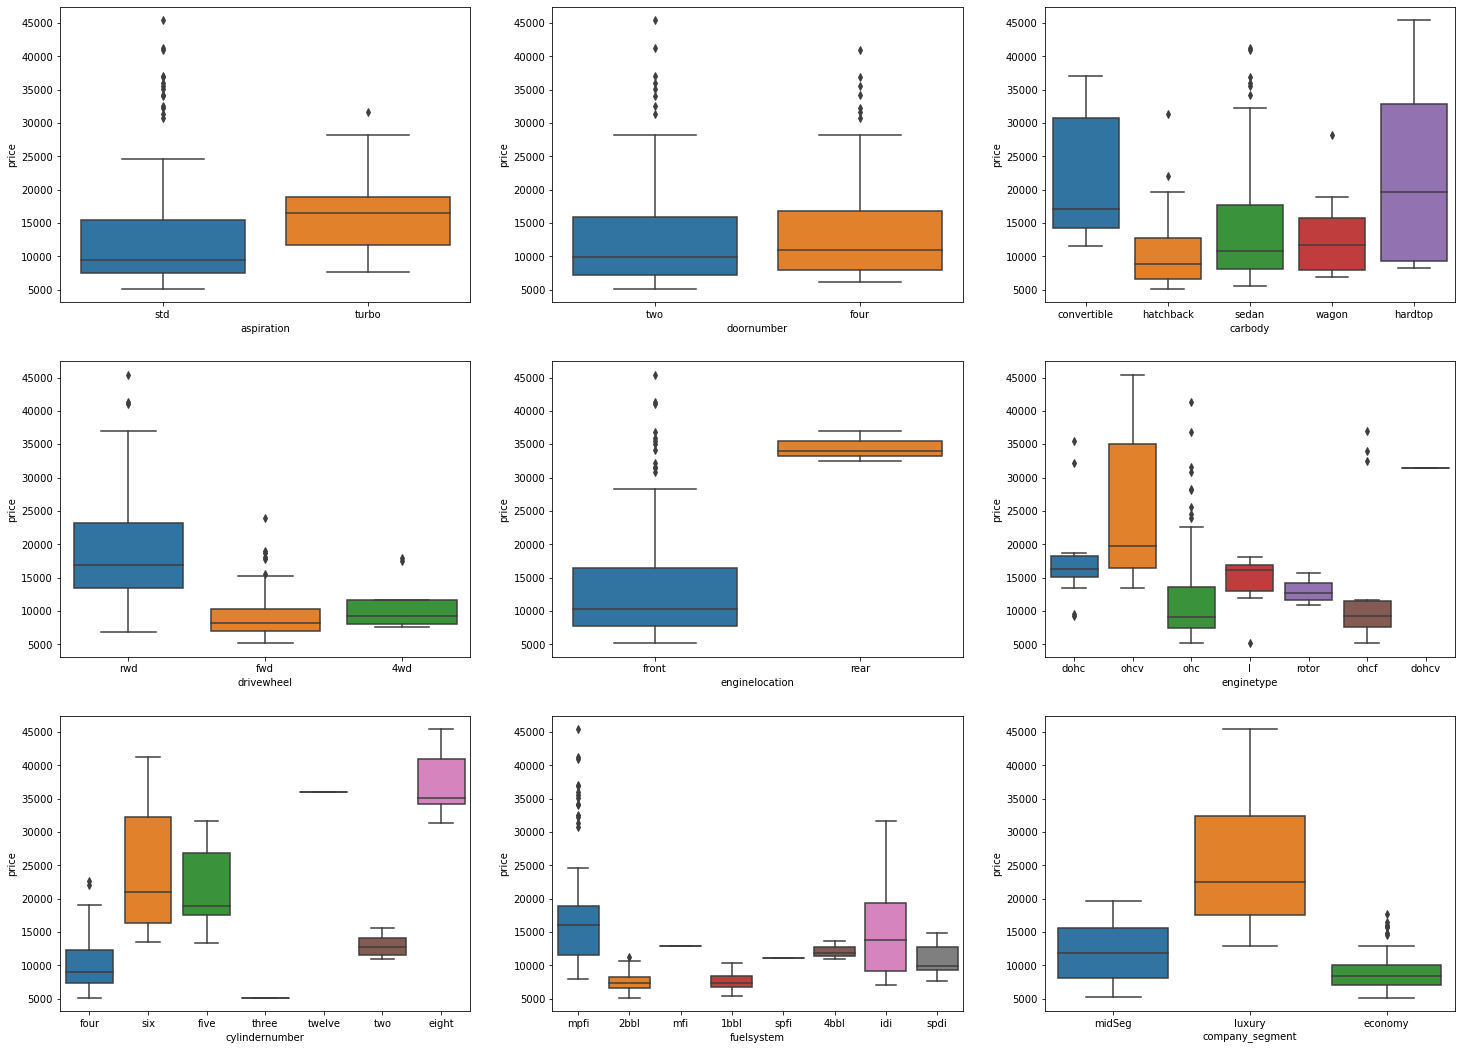

In [120]:
plotCatVsPrice(df_car_char)

In [121]:
df_car_2 = df_car.drop(columns = ['company', 'CarName'])

In [122]:
df_car_2.shape

(205, 25)

In [137]:
df_car_char = list(df_car_2.columns[df_car_2.dtypes == 'object'])

In [138]:
df_car_char #This is the categorical variables list

['fueltype',
 'aspiration',
 'doornumber',
 'carbody',
 'drivewheel',
 'enginelocation',
 'enginetype',
 'cylindernumber',
 'fuelsystem',
 'company_segment']

Now let us plot all categorical variables against price

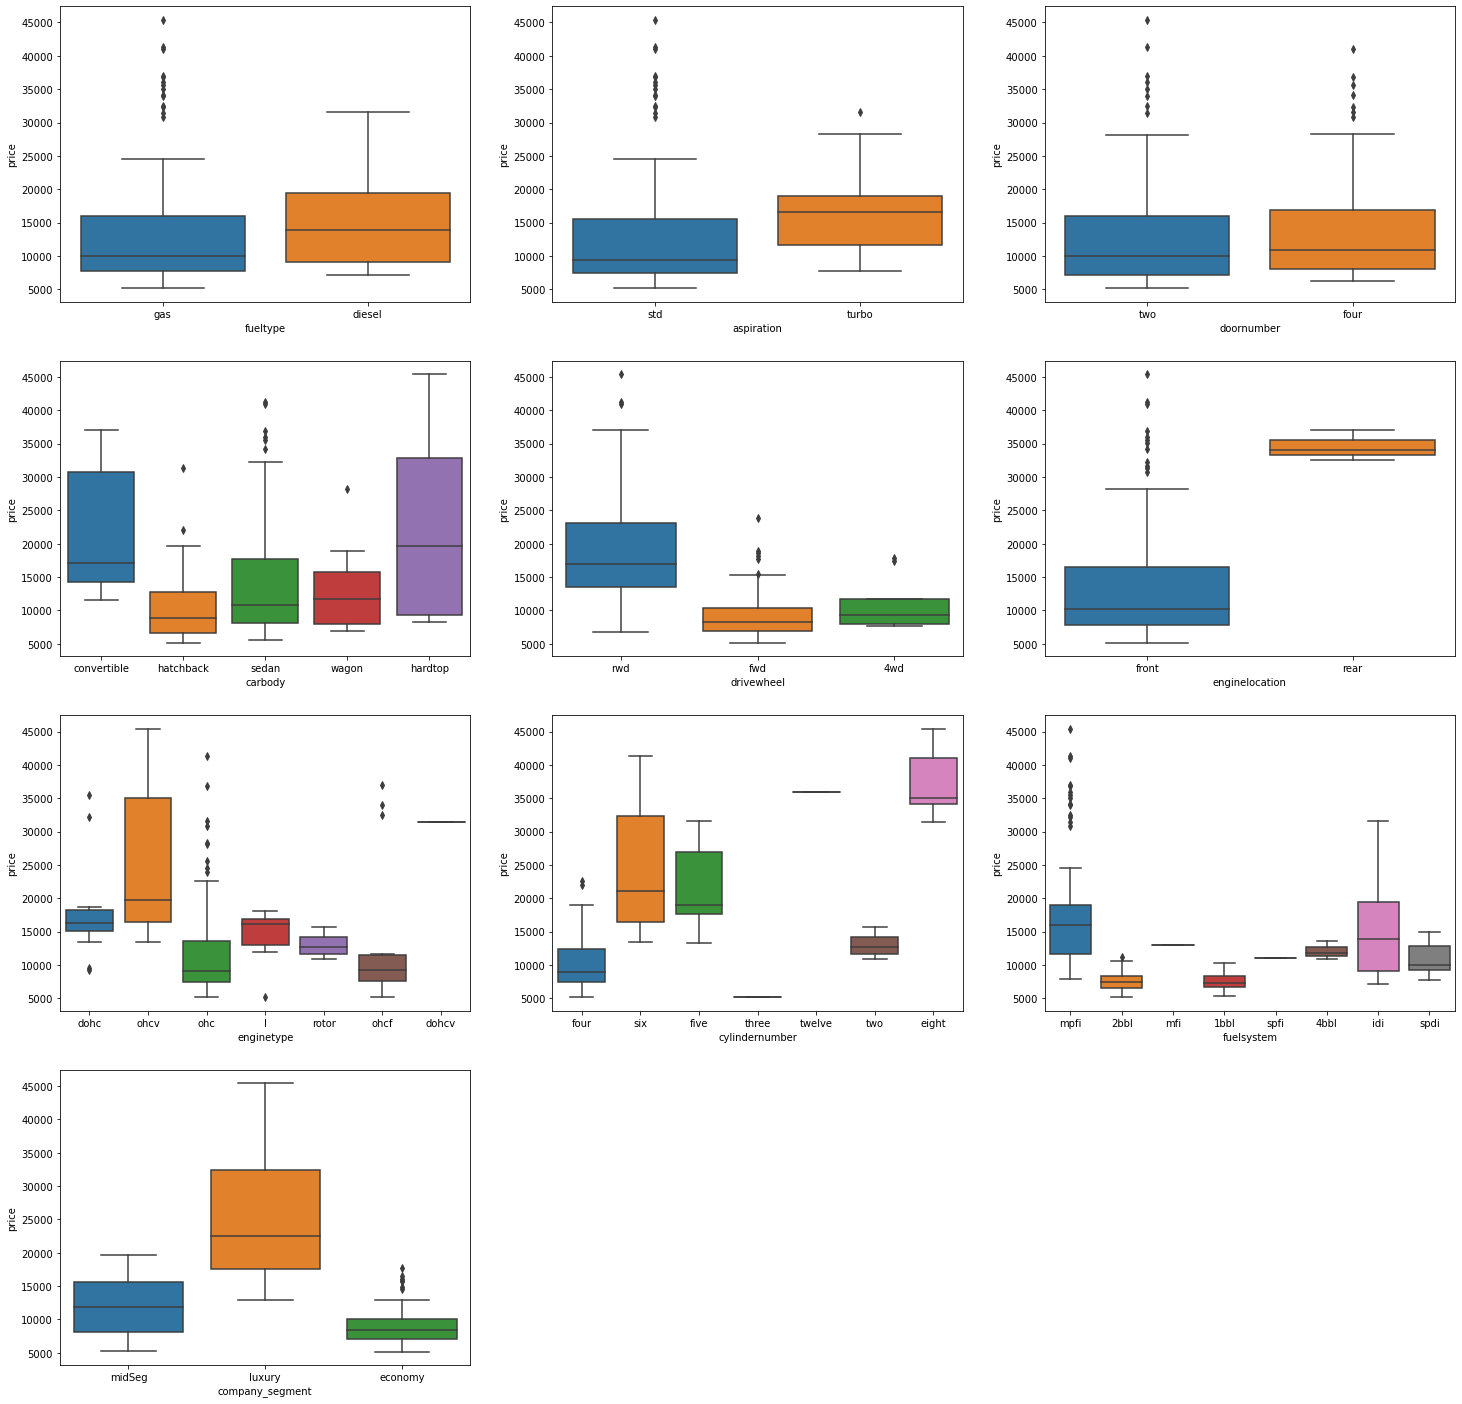

In [125]:
plotCatVsPrice(df_car_char)

As you can see, fueltype, aspiration, and doornumber don't make a significant difference to price. 4wd and fwd performw nearly the same wrt price, while sedan and wagon are also fairly similar. You will notice there are some mispellings present, let us clean this data further.

In [129]:
df_car_2['enginetype'].replace(['ohcf', 'ohc'], 'ohcv', inplace=True)
df_car_2['enginetype'].replace('dohcv', 'dohc', inplace=True)
df_car_2['fuelsystem'].replace('spfi','spdi', inplace = True)
df_car_2['fuelsystem'].replace('mfi','mpfi', inplace = True)
df_car_2['drivewheel'].replace(['4wd','fwd'], '4wd&fwd', inplace=True)
df_car_2['carbody'].replace(['sedan', 'wagon'], 'sedan&wagon', inplace=True)

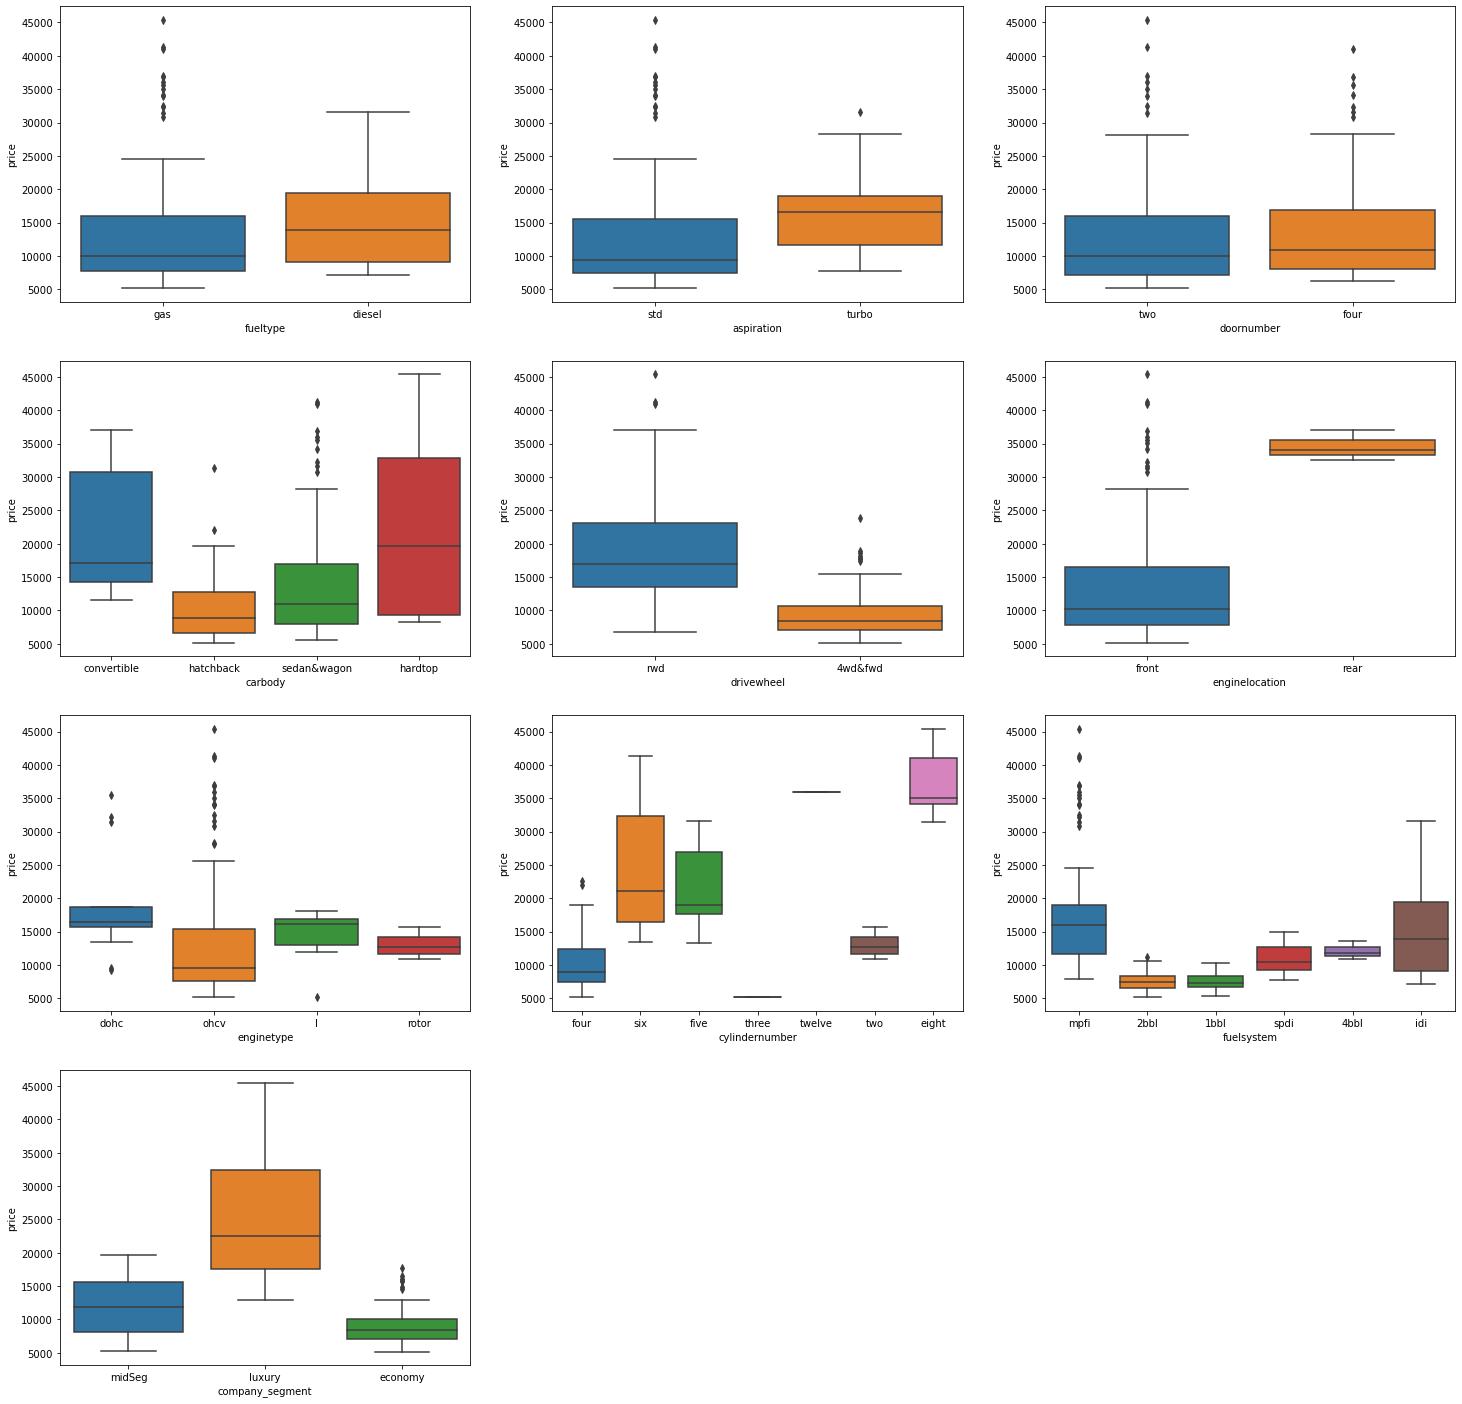

In [130]:
plotCatVsPrice(df_car_char)

As is visible now, l and dohc engine types are nearly the same. 1bbl and 2bbl fuelsystems are also nearly the same.

In [143]:
df_car_2['enginetype'].replace(['l', 'dohc'], 'dohc&l', inplace = True)
df_car_2['fuelsystem'].replace(['1bbl', '2bbl'], '1&2bbl', inplace=True)

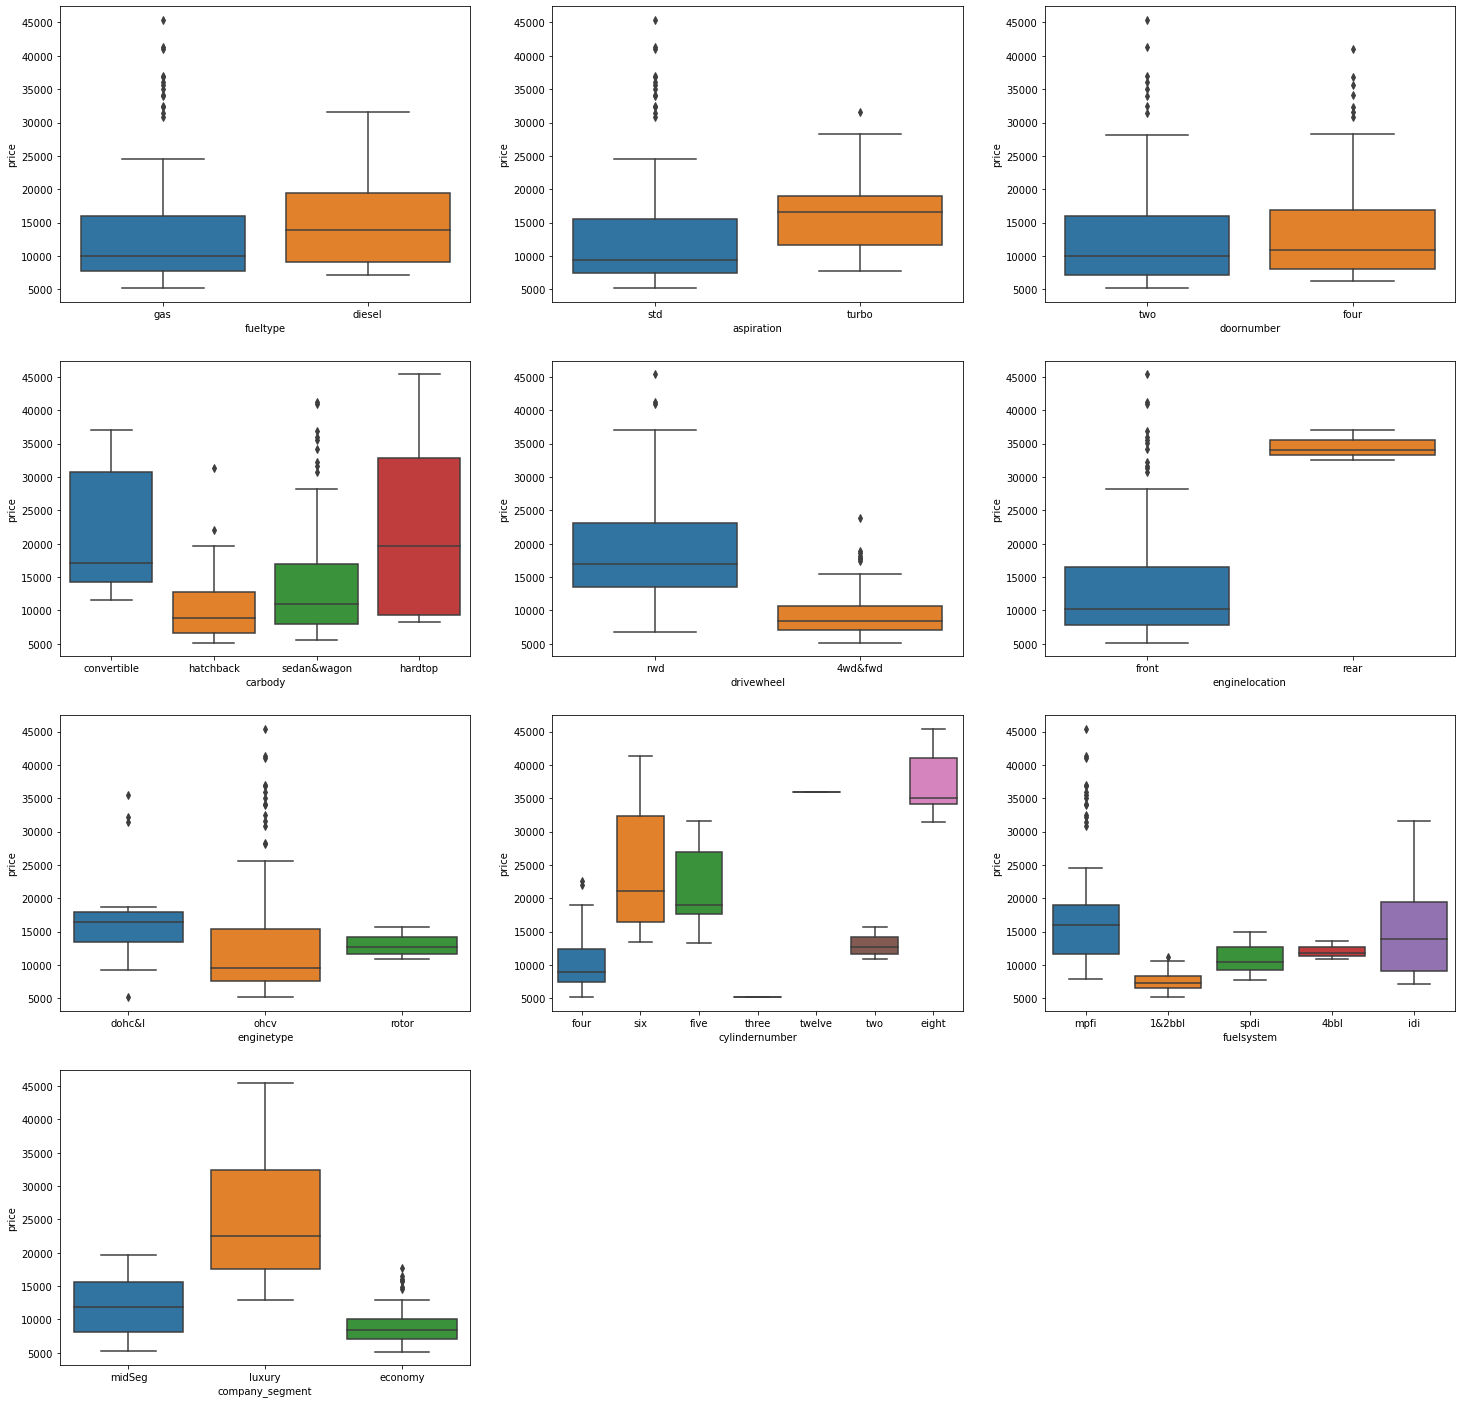

In [144]:
plotCatVsPrice(df_car_char)

Let us drop fueltype, doornumber, and aspiration 

In [ ]:
df_car_2.drop(['fueltype','doornumber', 'aspiration'], axis=1, inplace=True)

In [153]:
df_car_char = list(df_car_2.columns[df_car_2.dtypes == 'object'])

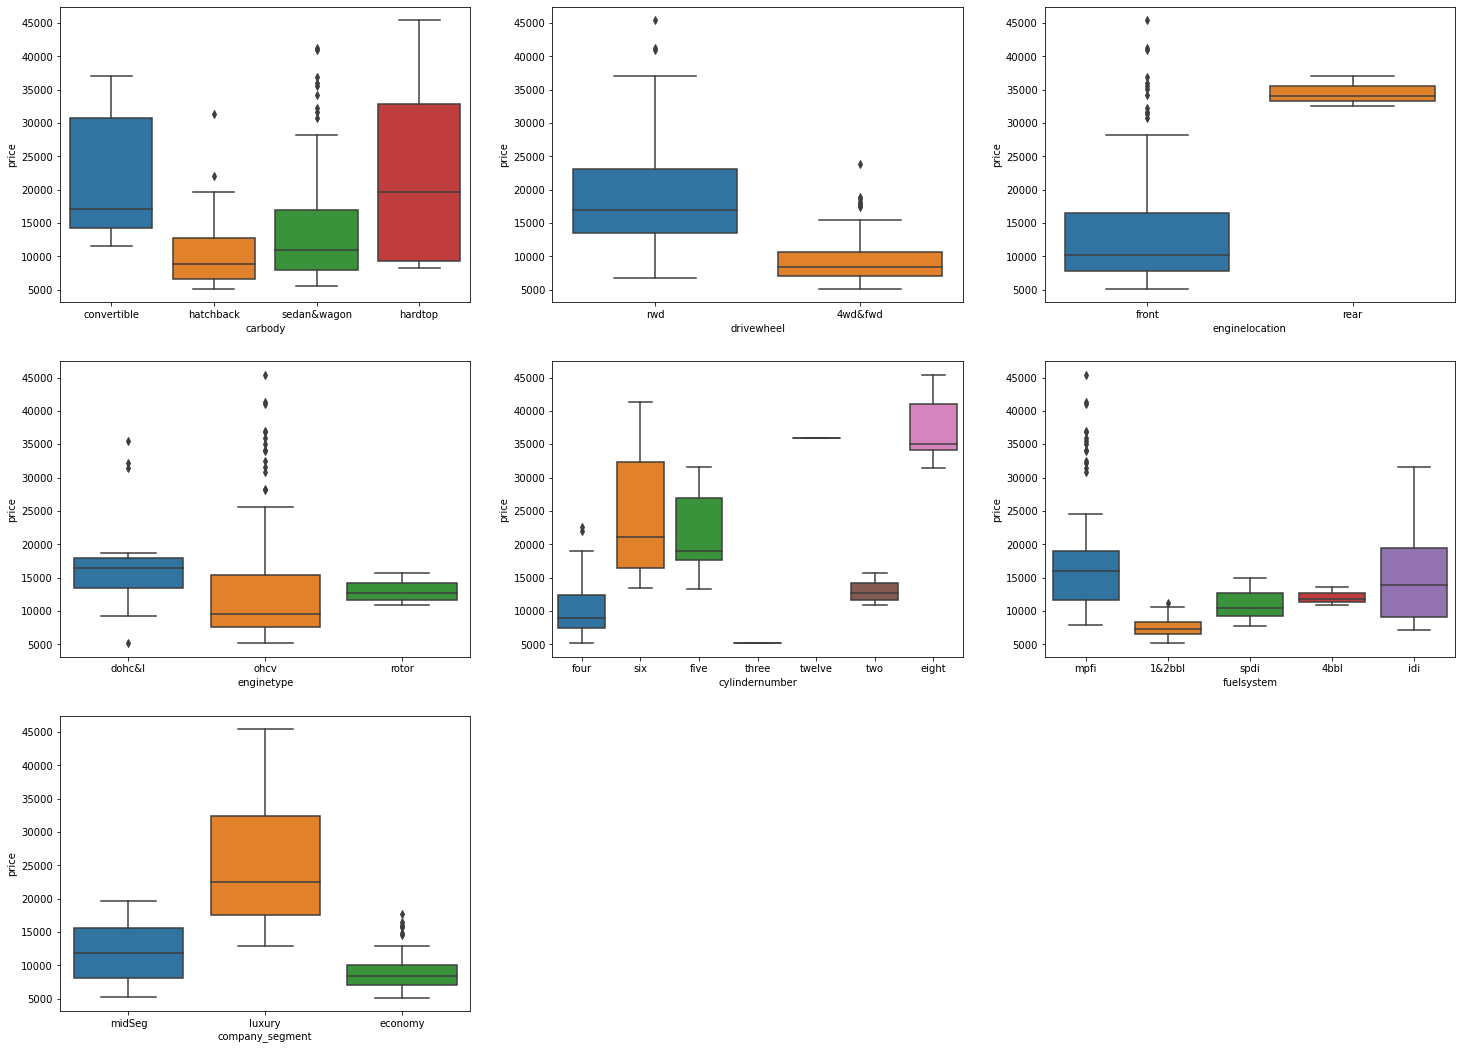

In [154]:
plotCatVsPrice(df_car_char)

As we can see, the most significant categorical variables to price are cylindernumber, company_segment, enginelocation, drivewheel, and carbody.

In [155]:
df_car_2.columns

Index(['symboling', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price', 'company_segment'],
      dtype='object')

In [156]:
#Now mapping some categorical variables to numeric values
df_car_2['enginelocation'] = df_car_2['enginelocation'].map({'front': 1, 'rear': 0})

In [157]:
df_car_2.shape

(205, 22)

In [158]:
#Dummy variable assignment
df_car_dummies = pd.get_dummies(df_car_2) 

In [159]:
df_car_dummies.head()

,symboling,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,...,cylindernumber_twelve,cylindernumber_two,fuelsystem_1&2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mpfi,fuelsystem_spdi,company_segment_economy,company_segment_luxury,company_segment_midSeg
0,3,1,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,...,0,0,0,0,0,1,0,0,0,1
1,3,1,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,...,0,0,0,0,0,1,0,0,0,1
2,1,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,...,0,0,0,0,0,1,0,0,0,1
3,2,1,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,...,0,0,0,0,0,1,0,0,1,0
4,2,1,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,...,0,0,0,0,0,1,0,0,1,0


In [166]:
# features to scale - Only numeric, non binary vars
features_to_normalize = ['symboling',  'enginesize', 'boreratio', 'stroke', 'compressionratio','horsepower'
                         , 'peakrpm',  'price','curbweight','wheelbase','highwaympg'
                         , 'carlength','carwidth','carheight','citympg' ]

In [161]:
np.random.seed(42)
df_train, df_test = train_test_split(df_car_dummies, train_size=0.7 ,test_size = 0.3, random_state=42)

In [162]:
df_train.shape

(143, 40)

In [163]:
df_test.shape

(62, 40)

Just checking shape to see if correct

In [164]:
#Instantiating scaling object for values
scaler = MinMaxScaler()

In [167]:
df_train[features_to_normalize] = scaler.fit_transform(df_train[features_to_normalize])

In [168]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 143 entries, 177 to 102
Data columns (total 40 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   symboling                143 non-null    float64
 1   enginelocation           143 non-null    int64  
 2   wheelbase                143 non-null    float64
 3   carlength                143 non-null    float64
 4   carwidth                 143 non-null    float64
 5   carheight                143 non-null    float64
 6   curbweight               143 non-null    float64
 7   enginesize               143 non-null    float64
 8   boreratio                143 non-null    float64
 9   stroke                   143 non-null    float64
 10  compressionratio         143 non-null    float64
 11  horsepower               143 non-null    float64
 12  peakrpm                  143 non-null    float64
 13  citympg                  143 non-null    float64
 14  highwaympg              

In [169]:
df_train.describe()

,symboling,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,...,cylindernumber_twelve,cylindernumber_two,fuelsystem_1&2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mpfi,fuelsystem_spdi,company_segment_economy,company_segment_luxury,company_segment_midSeg
count,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,...,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000
mean,0.569231,0.986014,0.425175,0.518194,0.398934,0.499301,0.335664,0.222711,0.557542,0.565501,...,0.006993,0.013986,0.363636,0.006993,0.083916,0.496503,0.048951,0.440559,0.216783,0.335664
std,0.247019,0.117845,0.209439,0.213919,0.207804,0.206673,0.232474,0.161861,0.194528,0.146397,...,0.083624,0.117845,0.482737,0.083624,0.278236,0.501745,0.216524,0.498199,0.413502,0.473882
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.400000,1.000000,0.272414,0.382759,0.228571,0.350000,0.165332,0.109375,0.435714,0.497619,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.600000,1.000000,0.365517,0.496552,0.352381,0.525000,0.277704,0.195312,0.550000,0.571429,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.800000,1.000000,0.537931,0.689655,0.485714,0.658333,0.504673,0.277344,0.714286,0.635714,...,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Features have been scaled

In [170]:
# divide training data into X and y
y_train = df_train.pop('price')
X_train = df_train

In [171]:
X_train.shape

(143, 39)

In [173]:
y_train.shape

(143,)

In [174]:
y_train

177    0.152177
75     0.282632
174    0.138523
31     0.043121
12     0.393526
         ...   
106    0.329701
14     0.482771
92     0.042972
179    0.270096
102    0.230401
Name: price, Length: 143, dtype: float64

In [175]:
#Creating VIF function
def calculateVIFFactors(df):
    
    df_VIF = pd.DataFrame()
    df_VIF['variables'] = df.columns
    df_VIF['calculated_VIF'] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    df_VIF['calculated_VIF'] = round(df_VIF['calculated_VIF'],2)
    df_VIF = df_VIF.sort_values(by = "calculated_VIF", ascending = False)
    return(df_VIF)

In [176]:
# function to simplify fitting the model and print summary

def fit_LRM(X_train):
    
    import statsmodels.api as sm

    X_train = sm.add_constant(X_train)
    model = sm.OLS(y_train,X_train).fit() 
    print(model.summary())
    return model

In [182]:
X_train = X_train.astype(float)
X_train_1 = sm.add_constant(X_train)
model = sm.OLS(y_train,X_train, missing='drop').fit()

In [184]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.949
Model:                            OLS   Adj. R-squared:                  0.934
Method:                 Least Squares   F-statistic:                     63.46
Date:                Sun, 27 Jun 2021   Prob (F-statistic):           4.14e-57
Time:                        23:00:45   Log-Likelihood:                 243.98
No. Observations:                 143   AIC:                            -422.0
Df Residuals:                     110   BIC:                            -324.2
Df Model:                          32                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
symboling                 

In [185]:
# drop carlength as it has highest p-value               
X_train_2 = X_train_1.drop(['carlength'], axis=1)
model2 =fit_LRM(X_train_2) # second model

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.949
Model:                            OLS   Adj. R-squared:                  0.934
Method:                 Least Squares   F-statistic:                     66.10
Date:                Sun, 27 Jun 2021   Prob (F-statistic):           5.03e-58
Time:                        23:03:58   Log-Likelihood:                 243.98
No. Observations:                 143   AIC:                            -424.0
Df Residuals:                     111   BIC:                            -329.1
Df Model:                          31                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

Given that we have too many variables, let us drop a few and try again

In [188]:
X_train_3 = X_train_2.drop(['boreratio','stroke', 'compressionratio', 'peakrpm', 'carheight',
            'cylindernumber_three', 'cylindernumber_twelve', 'highwaympg'], axis = 1)

In [189]:
model3 = fit_LRM(X_train_3)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.941
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                     75.10
Date:                Sun, 27 Jun 2021   Prob (F-statistic):           2.18e-60
Time:                        23:10:34   Log-Likelihood:                 234.51
No. Observations:                 143   AIC:                            -417.0
Df Residuals:                     117   BIC:                            -340.0
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

Let us drop cylindernumber_six as it has pvalue of 1

In [190]:
X_train_4 = X_train_3.drop('cylindernumber_six', axis=1)

In [191]:
model4 = fit_LRM(X_train_4)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.941
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                     78.90
Date:                Sun, 27 Jun 2021   Prob (F-statistic):           2.42e-61
Time:                        23:12:31   Log-Likelihood:                 234.51
No. Observations:                 143   AIC:                            -419.0
Df Residuals:                     118   BIC:                            -344.9
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

In [193]:
#Removing fuelsystem_4bbl for high p-value
X_train_5 = X_train_4.drop('fuelsystem_4bbl', axis=1)

In [194]:
model5 = fit_LRM(X_train_5)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.941
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                     78.90
Date:                Sun, 27 Jun 2021   Prob (F-statistic):           2.42e-61
Time:                        23:14:11   Log-Likelihood:                 234.51
No. Observations:                 143   AIC:                            -419.0
Df Residuals:                     118   BIC:                            -344.9
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

Removing company segment economy and symboling for p-value:

In [196]:
X_train_6 = X_train_5.drop(['company_segment_economy', 'symboling'], axis=1)

In [197]:
model6 = fit_LRM(X_train_6)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.940
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                     85.13
Date:                Sun, 27 Jun 2021   Prob (F-statistic):           1.30e-62
Time:                        23:16:06   Log-Likelihood:                 232.64
No. Observations:                 143   AIC:                            -419.3
Df Residuals:                     120   BIC:                            -351.1
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0

In [198]:
X_train_7 = X_train_6.drop(['wheelbase','citympg', 'fuelsystem_1&2bbl'], axis=1)

In [199]:
model7 = fit_LRM(X_train_7)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.940
Model:                            OLS   Adj. R-squared:                  0.930
Method:                 Least Squares   F-statistic:                     100.9
Date:                Sun, 27 Jun 2021   Prob (F-statistic):           1.42e-65
Time:                        23:21:17   Log-Likelihood:                 232.57
No. Observations:                 143   AIC:                            -425.1
Df Residuals:                     123   BIC:                            -365.9
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0

In [200]:
X_train_8 = X_train_7.drop(['fuelsystem_mpfi', 'cylindernumber_five', 'carbody_sedan&wagon'], axis=1)

In [201]:
model8 = fit_LRM(X_train_8)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.939
Model:                            OLS   Adj. R-squared:                  0.931
Method:                 Least Squares   F-statistic:                     113.6
Date:                Sun, 27 Jun 2021   Prob (F-statistic):           2.06e-67
Time:                        23:23:26   Log-Likelihood:                 231.99
No. Observations:                 143   AIC:                            -428.0
Df Residuals:                     125   BIC:                            -374.6
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0

In [206]:
X_train_9 = X_train_8.drop(['carwidth', 'carbody_hatchback', 'enginetype_ohcv'], axis=1)

In [207]:
model9 = fit_LRM(X_train_9)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.938
Model:                            OLS   Adj. R-squared:                  0.931
Method:                 Least Squares   F-statistic:                     128.8
Date:                Sun, 27 Jun 2021   Prob (F-statistic):           4.00e-69
Time:                        23:28:49   Log-Likelihood:                 230.93
No. Observations:                 143   AIC:                            -429.9
Df Residuals:                     127   BIC:                            -382.4
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0

In [208]:
X_train_10 = X_train_9.drop(['fuelsystem_spdi', 'drivewheel_rwd', 'enginetype_dohc&l'], axis=1)

In [209]:
model10 = fit_LRM(X_train_10)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.937
Model:                            OLS   Adj. R-squared:                  0.931
Method:                 Least Squares   F-statistic:                     147.9
Date:                Sun, 27 Jun 2021   Prob (F-statistic):           9.29e-71
Time:                        23:28:58   Log-Likelihood:                 229.53
No. Observations:                 143   AIC:                            -431.1
Df Residuals:                     129   BIC:                            -389.6
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0

In [210]:
X_train_11 = X_train_10.drop(['drivewheel_4wd&fwd', 'fuelsystem_idi', 'cylindernumber_four'], axis=1)

In [211]:
model11 = fit_LRM(X_train_11)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.935
Model:                            OLS   Adj. R-squared:                  0.930
Method:                 Least Squares   F-statistic:                     190.0
Date:                Sun, 27 Jun 2021   Prob (F-statistic):           3.05e-73
Time:                        23:30:50   Log-Likelihood:                 227.21
No. Observations:                 143   AIC:                            -432.4
Df Residuals:                     132   BIC:                            -399.8
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0

In [212]:
X_train_12 = X_train_11.drop('carbody_hardtop', axis = 1)

In [213]:
model12 = fit_LRM(X_train_12)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.934
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                     208.9
Date:                Sun, 27 Jun 2021   Prob (F-statistic):           6.23e-74
Time:                        23:31:49   Log-Likelihood:                 226.00
No. Observations:                 143   AIC:                            -432.0
Df Residuals:                     133   BIC:                            -402.4
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0

We cannot drop horsepower as it is very important, seeing as other values are lesser than .05 we move on to VIF

In [214]:
calculateVIFFactors(X_train_12)

,variables,calculated_VIF
6,enginetype_rotor,inf
8,cylindernumber_two,inf
0,const,100.78
3,enginesize,5.89
2,curbweight,4.46
4,horsepower,3.42
9,company_segment_luxury,1.99
7,cylindernumber_eight,1.44
10,company_segment_midSeg,1.31
1,enginelocation,1.28


In [215]:
#We cannot drop enginesize, so we drop enginelocation instead
X_train_13 = X_train_12.drop(['enginelocation', 'cylindernumber_two'], axis=1)

In [219]:
model13 = fit_LRM(X_train_13)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.918
Model:                            OLS   Adj. R-squared:                  0.913
Method:                 Least Squares   F-statistic:                     187.6
Date:                Sun, 27 Jun 2021   Prob (F-statistic):           7.00e-69
Time:                        23:38:47   Log-Likelihood:                 210.58
No. Observations:                 143   AIC:                            -403.2
Df Residuals:                     134   BIC:                            -376.5
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     -0

In [220]:
calculateVIFFactors(X_train_13)

,variables,calculated_VIF
2,enginesize,5.75
0,const,4.21
1,curbweight,3.97
3,horsepower,3.16
7,company_segment_luxury,1.94
6,cylindernumber_eight,1.39
8,company_segment_midSeg,1.31
5,enginetype_rotor,1.15
4,carbody_convertible,1.07


In [221]:
X_train_final = sm.add_constant(X_train_13)

In [222]:
model_final = sm.OLS(y_train,X_train_final).fit() # final model  

In [224]:
X_train_final.shape

(143, 9)

In [225]:
y_train.shape

(143,)

In [226]:
y_pred = model_final.predict(X_train_final)

In [227]:
y_pred.shape

(143,)

Text(0.5, 0, 'Errors')

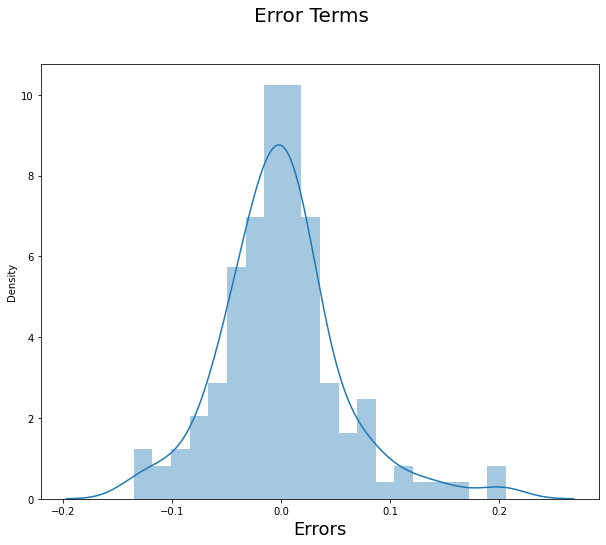

In [228]:
# Plot error terms for train data
fig = plt.figure(figsize = (10,8))
sns.distplot((y_train - y_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                   
plt.xlabel('Errors', fontsize = 18)    

In [229]:
# predictions with test data
df_test[features_to_normalize] = scaler.transform(df_test[features_to_normalize])

In [230]:
df_test.describe()

,symboling,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,...,cylindernumber_twelve,cylindernumber_two,fuelsystem_1&2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mpfi,fuelsystem_spdi,company_segment_economy,company_segment_luxury,company_segment_midSeg
count,62.00000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,...,62.0,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000
mean,0.56129,0.983871,0.405395,0.483648,0.373425,0.480914,0.309660,0.221333,0.579263,0.562135,...,0.0,0.032258,0.403226,0.032258,0.129032,0.387097,0.048387,0.467742,0.193548,0.306452
std,0.25566,0.127000,0.204468,0.209627,0.196487,0.197470,0.230834,0.165835,0.191679,0.157092,...,0.0,0.178127,0.494550,0.178127,0.337972,0.491062,0.216335,0.503032,0.398304,0.464783
min,0.00000,0.000000,0.000000,-0.060345,-0.142857,0.150000,-0.147308,-0.035156,0.264286,0.057143,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.40000,1.000000,0.272414,0.374138,0.190476,0.350000,0.136182,0.105469,0.435714,0.480952,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.50000,1.000000,0.350000,0.475862,0.347619,0.466667,0.256342,0.175781,0.564286,0.580952,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.80000,1.000000,0.527586,0.577586,0.447619,0.604167,0.477637,0.296875,0.767857,0.655952,...,0.0,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000
max,1.00000,1.000000,1.182759,1.094828,0.942857,0.941667,0.926124,0.929688,0.900000,0.871429,...,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [231]:
# seperating X_test and y_test
y_test = df_test.pop('price')
X_test = df_test 

In [232]:
X_train_13 = X_train_13.drop('const',axis=1)
X_test_final = X_test[X_train_13.columns]

In [233]:
X_test_final = sm.add_constant(X_test_final)

In [234]:
y_pred_I = model_final.predict(X_test_final)

Text(0.5, 0, 'Errors')

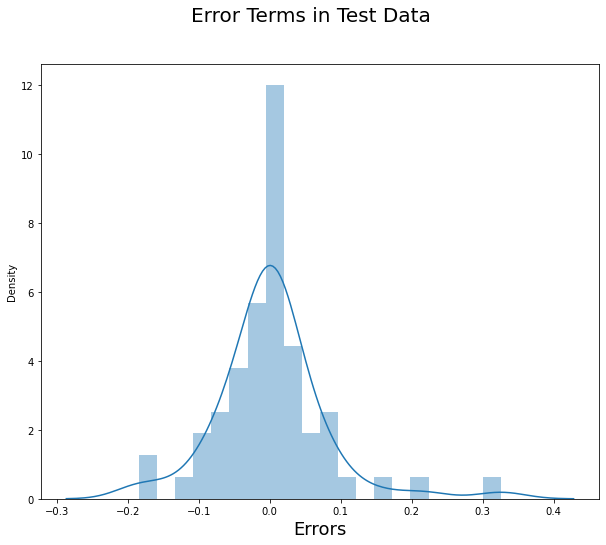

In [235]:
# Plot error terms for test data
fig = plt.figure(figsize = (10,8))
sns.distplot((y_test - y_pred_I), bins = 20)
fig.suptitle('Error Terms in Test Data', fontsize = 20)                   
plt.xlabel('Errors', fontsize = 18)  

In [236]:
rmse = sqrt(mean_squared_error(y_test, y_pred_I))
print('Model RMSE:',rmse)

from sklearn.metrics import r2_score
r2=r2_score(y_test, y_pred_I)
print('Model test r2_score:',r2)

Model RMSE: 0.07724683499110056
Model test r2_score: 0.8602511919139854


# As the R2 test value lies within 5% of the R2 value for train, it is acceptable

Features selected in final model:

1) curbweight
2) enginesize
3) horsepower
4) company_segment_luxury
5) cylindernumber_eight
6) company_segment_midSeg
7) enginetype_rotor
8) carbody_convertible	

R sq. Train: 0.918
Adj R sq. in Train: 0.913
R sq. in Test: 0.86